In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')
#pd.set_uption('max_columns', 200)

In [2]:
import os 
cwd = os.getcwd()
cwd

'/Users/amandap/Anaconda Scrips/PracticePy'

In [3]:
os.chdir('/Users/amandap/Downloads')
df = pd.read_csv('nba.csv')

In [4]:
df.shape

(458, 9)

In [5]:
df.head()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6-6,235.0,Marquette,6796117.0
2,John Holland,Boston Celtics,30.0,SG,27.0,6-5,205.0,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,6-5,185.0,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,6-10,231.0,NaN,5000000.0


In [6]:
df.columns

Index(['Name', 'Team', 'Number', 'Position', 'Age', 'Height', 'Weight',
       'College', 'Salary'],
      dtype='object')

In [7]:
df.dtypes

Name         object
Team         object
Number      float64
Position     object
Age         float64
Height       object
Weight      float64
College      object
Salary      float64
dtype: object

In [8]:
df.describe()

,Number,Age,Weight,Salary
count,457.000000,457.000000,457.000000,4.460000e+02
mean,17.678337,26.938731,221.522976,4.842684e+06
std,15.966090,4.404016,26.368343,5.229238e+06
min,0.000000,19.000000,161.000000,3.088800e+04
25%,5.000000,24.000000,200.000000,1.044792e+06
50%,13.000000,26.000000,220.000000,2.839073e+06
75%,25.000000,30.000000,240.000000,6.500000e+06
max,99.000000,40.000000,307.000000,2.500000e+07


In [17]:
df.columns

Index(['Name', 'Team', 'Number', 'Position', 'Age', 'Height', 'Weight',
       'College', 'Salary'],
      dtype='object')

In [19]:
#rewrite with subset
df = df[['Name', 'Team', 
    #'Number', 
    'Position', 'Age', 'Height', 
    #'Weight',
       'College', 'Salary']].copy()

In [ ]:
#df.drop(['Number'], axis=1)

In [20]:
df.shape

(458, 7)

In [23]:
#df['string'] = pd.to_datetime(df['string'])
#df['string'] = pd.to_number(df['string'])
df.dtypes

Name         object
Team         object
Position     object
Age         float64
Height       object
College      object
Salary      float64
dtype: object

In [24]:
df.columns

Index(['Name', 'Team', 'Position', 'Age', 'Height', 'College', 'Salary'], dtype='object')

In [32]:
df = df.rename(columns={'Name':'Player_Name','College':'University'})
df.head()

,Player_Name,Team,Position,Age,Height,University,Salary
0,Avery Bradley,Boston Celtics,PG,25.0,6-2,Texas,7730337.0
1,Jae Crowder,Boston Celtics,SF,25.0,6-6,Marquette,6796117.0
2,John Holland,Boston Celtics,SG,27.0,6-5,Boston University,NaN
3,R.J. Hunter,Boston Celtics,SG,22.0,6-5,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,PF,29.0,6-10,NaN,5000000.0


In [33]:
#find null values
df.isna()

,Player_Name,Team,Position,Age,Height,University,Salary
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False
4,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...
453,False,False,False,False,False,False,False
454,False,False,False,False,False,True,False
455,False,False,False,False,False,True,False
456,False,False,False,False,False,False,False


In [34]:
df.isna().sum()

Player_Name     1
Team            1
Position        1
Age             1
Height          1
University     85
Salary         12
dtype: int64

In [41]:
#locate duplicates

df.loc[df.duplicated(subset=['Player_Name'])]

,Player_Name,Team,Position,Age,Height,University,Salary


In [ ]:
#df.duplicated(subset=['Coaster_Name', 'Location', 'Opening_Date'])
#inverse ~df.duplicated(subset=['Coaster_Name', 'Location', 'Opening_Date'])
#df.loc[~df.duplicated(subset=['Coaster_Name', 'Location', 'Opening_Date'])] \
    #.reset_index(drop=True)


In [45]:
df.query('Team == "Boston Celtics"')

,Player_Name,Team,Position,Age,Height,University,Salary
0,Avery Bradley,Boston Celtics,PG,25.0,6-2,Texas,7730337.0
1,Jae Crowder,Boston Celtics,SF,25.0,6-6,Marquette,6796117.0
2,John Holland,Boston Celtics,SG,27.0,6-5,Boston University,NaN
3,R.J. Hunter,Boston Celtics,SG,22.0,6-5,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,PF,29.0,6-10,NaN,5000000.0
5,Amir Johnson,Boston Celtics,PF,29.0,6-9,NaN,12000000.0
6,Jordan Mickey,Boston Celtics,PF,21.0,6-8,LSU,1170960.0
7,Kelly Olynyk,Boston Celtics,C,25.0,7-0,Gonzaga,2165160.0
8,Terry Rozier,Boston Celtics,PG,22.0,6-2,Louisville,1824360.0
9,Marcus Smart,Boston Celtics,PG,22.0,6-4,Oklahoma State,3431040.0


In [47]:
df['Age'].value_counts()

24.0    47
25.0    45
27.0    41
23.0    41
26.0    36
28.0    31
30.0    31
29.0    28
22.0    26
31.0    22
20.0    19
21.0    19
33.0    14
32.0    13
34.0    10
36.0    10
35.0     9
37.0     4
38.0     4
40.0     3
39.0     2
19.0     2
Name: Age, dtype: int64

Text(0, 0.5, 'Count')

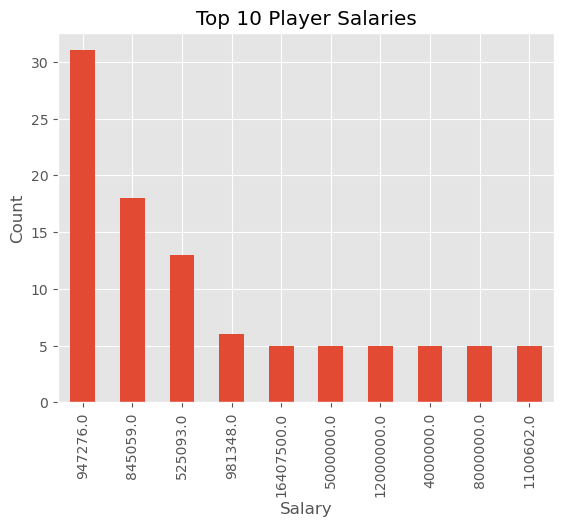

In [56]:
ax = df['Salary'].value_counts() \
    .head(10) \
    .plot(kind='bar', title='Top 10 Player Salaries')
ax.set_xlabel('Salary')
ax.set_ylabel('Count')

Text(0.5, 0, 'Player Age')

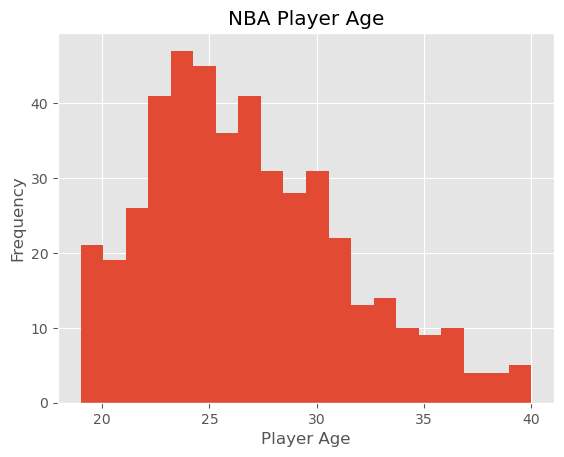

In [60]:
#distributions
ax = df['Age'].plot(kind='hist', bins=20, title='NBA Player Age')
ax.set_xlabel('Player Age')

Text(0.5, 0, 'Player Age')

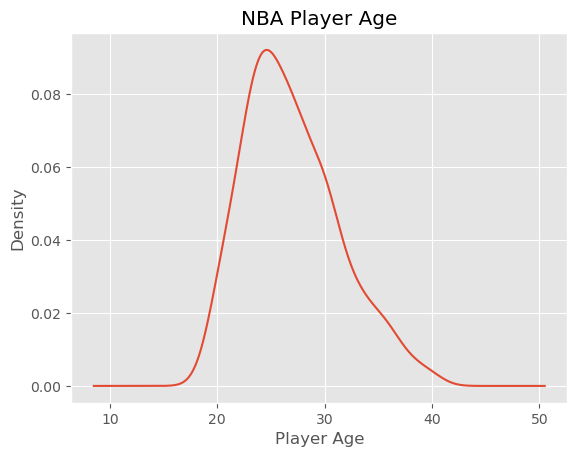

In [62]:
#distributions
ax = df['Age'].plot(kind='kde', title='NBA Player Age')
ax.set_xlabel('Player Age')

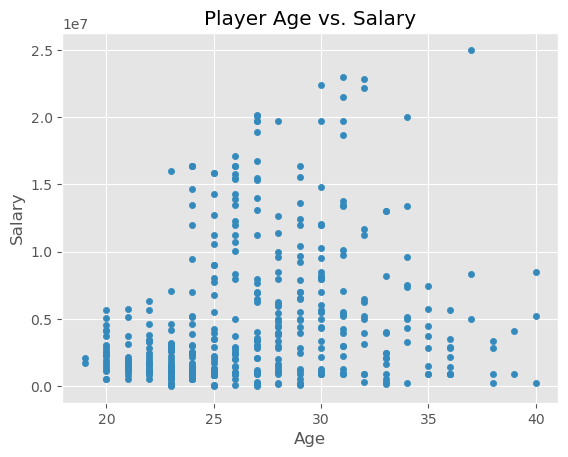

In [67]:
#relationships
df.plot(kind='scatter', x= 'Age', y= 'Salary', title='Player Age vs. Salary')
plt.show()

<AxesSubplot:xlabel='Age', ylabel='Salary'>

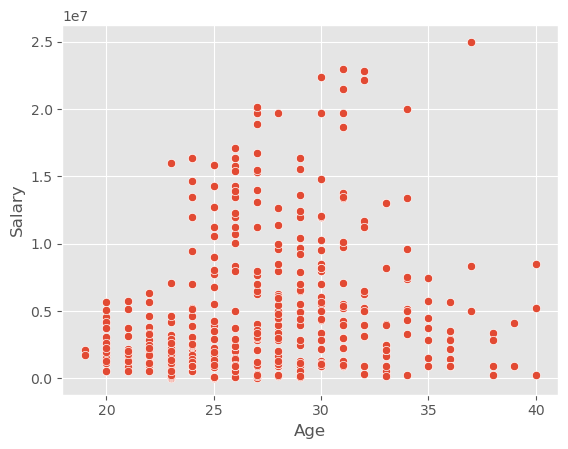

In [69]:
sns.scatterplot(x= 'Age', y= 'Salary', data=df)

<AxesSubplot:xlabel='Age', ylabel='Salary'>

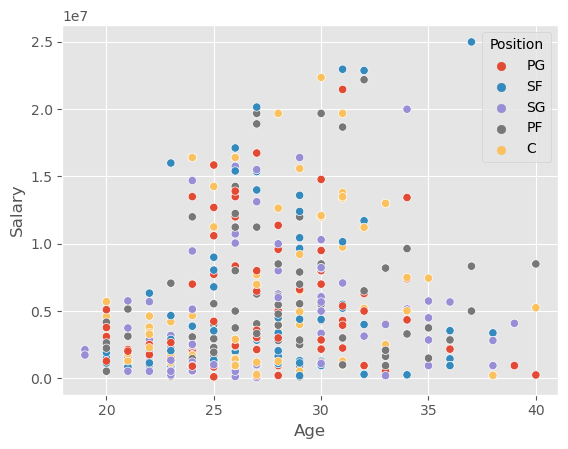

In [72]:
sns.scatterplot(x= 'Age', y= 'Salary', hue='Position', data=df)

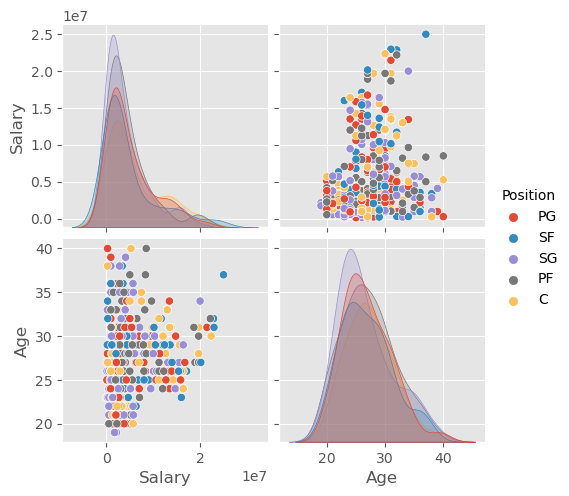

In [76]:
#compare multiple variables with histogram and scatter plots
sns.pairplot(df, vars=['Salary', 'Age'],
            hue='Position')
plt.show()

In [82]:
df_corr = df[['Salary', 'Age']].dropna().corr()
df_corr

,Salary,Age
Salary,1.000000,0.213459
Age,0.213459,1.000000


<AxesSubplot:>

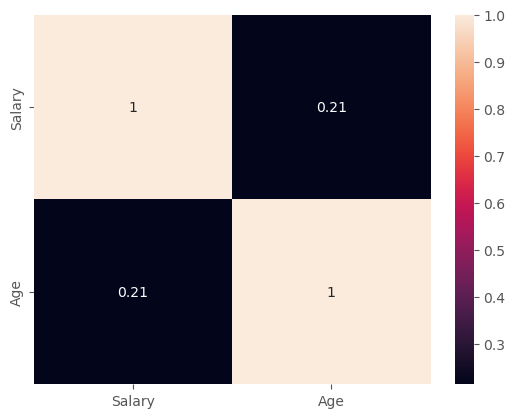

In [84]:
sns.heatmap(df_corr, annot=True)

In [85]:
df.head()
#What University produced the most NBA players ?(limit to 10)

,Player_Name,Team,Position,Age,Height,University,Salary
0,Avery Bradley,Boston Celtics,PG,25.0,6-2,Texas,7730337.0
1,Jae Crowder,Boston Celtics,SF,25.0,6-6,Marquette,6796117.0
2,John Holland,Boston Celtics,SG,27.0,6-5,Boston University,NaN
3,R.J. Hunter,Boston Celtics,SG,22.0,6-5,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,PF,29.0,6-10,NaN,5000000.0


In [125]:
df.query('University != "Texas"').groupby('University')['Salary'].agg(['mean','count']) \
    .query('count >= 10')

,mean,count
University,,
Arizona,3.325948e+06,13
Duke,4.443288e+06,18
Florida,6.533571e+06,10
Kansas,2.861320e+06,18
Kentucky,6.259389e+06,22
North Carolina,3.438716e+06,16
UCLA,5.804272e+06,14


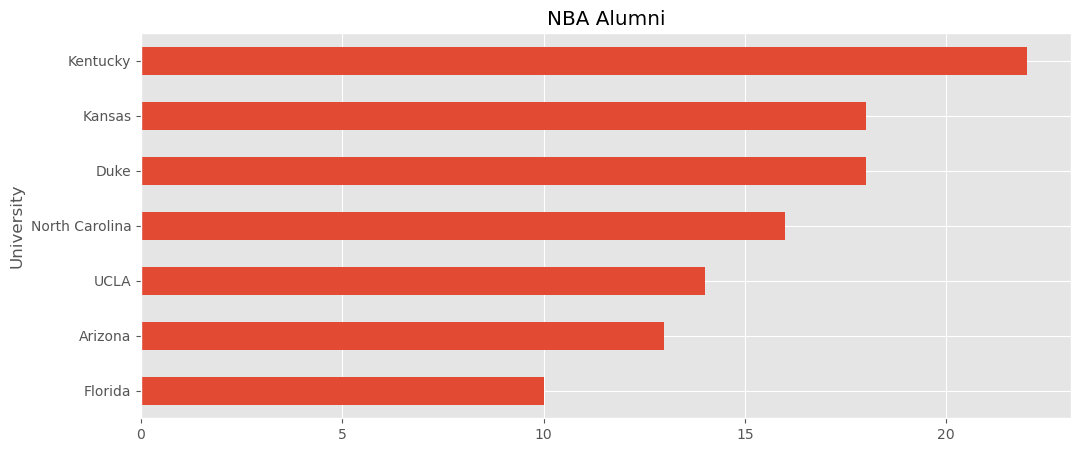

In [142]:
df.query('University != "Texas"').groupby('University')['Salary'].agg(['mean','count']) \
    .query('count >= 10') \
    .sort_values('count')['count'] \
    .plot(kind='barh', figsize=(12, 5), title='NBA Alumni')
ax.set_xlabel('Number of NBA Players', 
               fontweight ='bold')
plt.show()